<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/MEDICAL_DATASET_NEURALNETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Required Datasets
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read Insurance datasets
insurance = pd.read_csv("insurance.csv")
insurance
#Charges is a target variable

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance.info() #All are non-null. But some are not numerical
#To change them into numerical variables - we will do one hot encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Create a female column, 1 if it is female and 0 in male
#Lets one hot encode
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
#Splitting

X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

X.head(3)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,0,0,1,0,0,0,1
1,18,33.77,1,0,1,1,0,0,0,1,0
2,28,33.00,3,0,1,1,0,0,0,1,0


In [6]:
y.head(3)

0    16884.9240
1     1725.5523
2     4449.4620
Name: charges, dtype: float64

In [7]:
#Creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X),len(X_train),len(X_test))
print(len(y),len(y_train),len(y_test))

1338 1070 268
1338 1070 268


In [8]:
X_train.head(2) #it is shuffled :)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0


In [9]:
#Building a neural network
tf.random.set_seed(42)

#1.Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3.Fit
insurance_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8642.0918 - mae: 8642.0918
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7884.0542 - mae: 7884.0542
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.7832 - mae: 7585.7832
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7579.2896 - mae: 7579.2896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7628.8813 - mae: 7628.8813
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7617.9360 - mae: 7617.9360
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7650.3760 - mae: 7650.3760
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7752.2905 - mae: 7752.2905
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7527.0830 - mae: 7527.0830
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7652.1768 - mae: 7652.1768

In [10]:
#Check the results of the insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 1s 5ms/step - loss: 7018.8584 - mae: 7018.8584


[7018.8583984375, 7018.8583984375]

In [11]:
y_train.median(), y_train.mean() #our model is wayyy to wrong :)

(9575.4421, 13346.089736364485)

In [12]:
#Improve our model
tf.random.set_seed(42)

#1.Create a model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#3.Fit
insurance_model2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 6ms/step - loss: 13271.7354 - mae: 13271.7354
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13065.7422 - mae: 13065.7422
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12653.1289 - mae: 12653.1289
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 11875.2334 - mae: 11875.2334
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10637.0723 - mae: 10637.0723
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9154.4365 - mae: 9154.4365
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7922.7598 - mae: 7922.7598
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7466.3052 - mae: 7466.3052
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7406.9946 - mae: 7406.9946
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7387.6699 - mae:

In [13]:
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4741.3672 - mae: 4741.3672


[4741.3671875, 4741.3671875]

In [14]:
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

history = insurance_model3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 2ms/step - loss: 13305.7109 - mae: 13305.7109
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13163.9297 - mae: 13163.9297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12859.1055 - mae: 12859.1055
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12249.3857 - mae: 12249.3857
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11200.0264 - mae: 11200.0264
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9783.0811 - mae: 9783.0811
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8385.0176 - mae: 8385.0176
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7602.8716 - mae: 7602.8716
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7440.2031 - mae: 7440.2031
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7416.9482 - mae:

In [15]:
#Evaluate our 3rd model
insurance_model3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3505.6382 - mae: 3505.6382


[3505.63818359375, 3505.63818359375]

Text(0.5, 0, 'epochs')

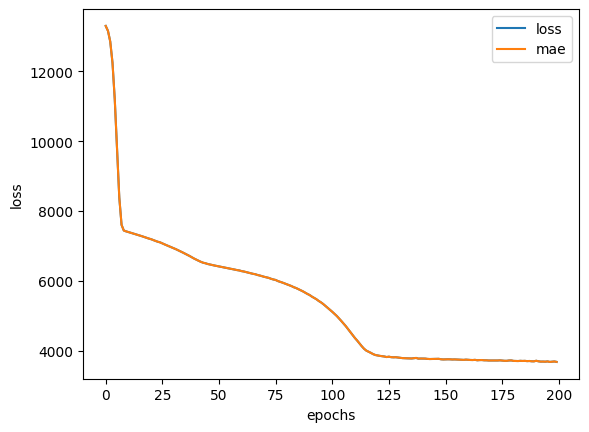

In [16]:
#Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
#loss curve going down is great

## Preprocessing Dara (normalization and standardization)

* ***NORMALIZATION*** - Normalization is one of the most frequently used data preparation techniques, which helps us to change the values of numeric columns in the dataset to use a common scale. Converts all the values to between 0 and 1 whilst preserving the original distribution.

* ***STANDARDIZATION*** - Removers the mean and divides each value by the standard deviation.

* --------->In termas of scaling, neural networks prefer the normalization technique.

In [17]:
X # Age is on a diffrent scale

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

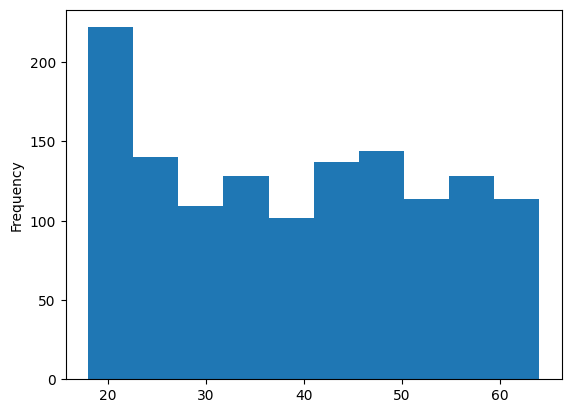

In [19]:
X["age"].plot(kind="hist") #Age has way too much variation

<Axes: ylabel='Frequency'>

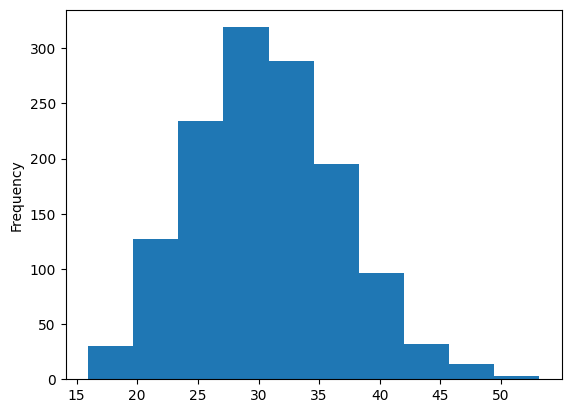

In [21]:
X["bmi"].plot(kind="hist") #Bmi also has way too variation
#What if we want these two on some kind of similiar scale

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in the insurance dataframe
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
#To prepare our data we can borrow a few classes from scikit learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer - we have to transform our column in some way before passsing it in our neural network

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), #passing all the column names that we naeed to normalize (Numerical Types)
    (OneHotEncoder (handle_unknown="ignore"),["sex","smoker","region"]) #Columns we want to OneHotEncode (Categorical types)
)


# Create our X and y values now
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Lets build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [33]:
#What does our data look like now
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [34]:
X_train_normal[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [35]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [36]:
#Checking the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

#### Beautiful! Our data has been normalized and on ehot encoded. Now lets build a neural network model and see how it goes.

In [41]:
tf.random.set_seed(42)

normal_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

normal_model.compile(loss=tf.keras.losses.mae,
                     optimizer = tf.keras.optimizers.SGD(),
                     metrics=["mae"])

normal_model.fit(tf.expand_dims(X_train_normal,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13337.6660 - mae: 13337.6660
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 10641.7002 - mae: 10641.7002
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 6145.1436 - mae: 6145.1436
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 5586.5220 - mae: 5586.5220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5235.9517 - mae: 5235.9517
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5182.0864 - mae: 5182.0864
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 4858.8164 - mae: 4858.8164
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4669.4580 - mae: 4669.4580
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5890.4702 - mae: 5890.4702
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4825.3350 - mae: 4825.

In [43]:
#Evaluate our model trained for normalized data
#Because we have trained it on normalized data we have to evaluate it on normalized data

normal_model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3602.1150 - mae: 3602.1150


[3602.114990234375, 3602.114990234375]